In [2]:
from pathlib import Path

In [3]:
plot_path = Path('Plots')

In [4]:
def make_fn_eval(case,_type):
    #_x = v_x.split('(')[0]
    #_y = v_y.split('(')[0]
    f = f'evalOA_{case}_{_type}.png'
    return plot_path /f

In [5]:
plot_path.mkdir(exist_ok=True, parents=True)

## EBAS OA timeseries:

In [6]:
    download_link= 'http://ebas-data.nilu.no/DataSets.aspx?stations=FI0050R&InstrumentTypes=aerosol_mass_spectrometer&fromDate=1970-01-01&toDate=2021-12-31'

## Read in model data. 

In [7]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

## Settings:

In [11]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [12]:
from_t = '2011-01-01'
to_t = '2015-01-01'

## Cases:

In [13]:
cases_sec = ['OsloAeroSec_intBVOC_f19_f19']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

In [14]:
case_mod = cases_sec[0]

In [15]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-01-24 01:35:09,671 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


2022-01-24 01:35:09,671 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


In [16]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','U','V',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 


### Use STP to compare against EBAS data

In [17]:
for case_name in cases_sec:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS
UUUPS


In [18]:
dic_ds = dict()
for ca in cases_orig + cases_sec:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    dic_ds[ca]=ds

2022-01-24 01:35:09,819 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/SOA_LV_OsloAero_int

2022-01-24 01:35:14,576 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/H2SO4_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/H2SO4_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_in

In [19]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [20]:
T =273.15 #K

In [21]:

def get_dic_df_mod(model_lev_i=-1):
    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        ds_sel = ds.sel(station='SMR').isel( lev=model_lev_i)
        rho = pressure*100/(R*T)
    
        ds_sel['rho'] = rho#.load()
        df = ds_sel.to_dataframe()
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel[s].attrs['units']!=un:
                ds_sel[s] = ds_sel[s]*ds_sel['rho']*kg2ug
                ds_sel[s].attrs['units']=un

        df = ds_sel.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
    
    
    
    
        df_daily = df#.resample('D').median()

        months = (df_daily.index.month==7 )|(df_daily.index.month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        dic_df[ca] = df_s
        print(ca)
    
        months = (df.index.month==7 )|(df.index.month==8  )

        df_s = df[months]
        df_ym = df_s.resample('Y').median()
        df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_ym
        print(ca)
    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [22]:
import pandas as pd

In [23]:
import xarray as xr

In [24]:
from bs_fdbck.constants import measurements_path

In [25]:
fn = measurements_path /'Ebas_211201_2307'/'FI0050R.20130101000000.20210215000000.aerosol_mass_spectrometer.organic_mass.pm1_non_refractory.9mo.1h.FI03L_Aerodyne_Q-ACSM_140-104.FI03L_Ng_2011.lev2.nc'
fn2 = measurements_path /'Ebas_211201_2307'/ 'FI0050R.20140101000000.20210215000000.aerosol_mass_spectrometer.organic_mass.pm1_non_refractory.1y.1h.FI03L_Aerodyne_Q-ACSM_140-104.FI03L_Ng_2011.lev2.nc'
fn3 = measurements_path /'Ebas_211201_2307'/'FI0050R.20120328000000.20210224065432.aerosol_mass_spectrometer.organic_mass.pm1_non_refractory.9mo.1h.FI03L_Aerodyne_Q-ACSM_140-104.FI03L_Ng_2011.lev2.nc'
org_hyy = xr.open_mfdataset([fn, fn2, fn3], combine ='by_coords',concat_dim='time')#pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

org_hyy['time'] = pd.to_datetime(org_hyy['time'])

org_hyy['time'] = org_hyy['time'].values + np.timedelta64(2,'h')

In [26]:
org_hyy = org_hyy.mean('metadata_time')#.attrs#['time']

In [27]:
obs_hyy_s2013 = org_hyy['organic_mass_amean'].sel(time=slice('2012-01-01','2015-01-01')).to_dataframe()
obs_hyy_s2013 = obs_hyy_s2013['organic_mass_amean']


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [28]:
obs_hyy_s2013 = obs_hyy_s2013[(obs_hyy_s2013.index.month==7) |(obs_hyy_s2013.index.month==8)]

obs_an = obs_hyy_s2013.resample('h').ffill()-obs_hyy_s2013.resample('D').mean().resample('h').ffill()

obs_an = obs_an[(obs_an.index.month==7) |(obs_an.index.month==8)]

mask= obs_an.notnull()

In [29]:
mask_mo = obs_hyy_s2013.resample('h').ffill()

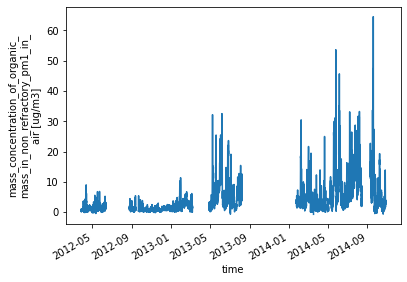

In [30]:
org_hyy['organic_mass_amean'].plot()
#org_hyy['organic_mass_amean'].isel(metadata_time=1).plot()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(array([1.0612e+04, 2.1550e+03, 8.4400e+02, 3.4300e+02, 1.0900e+02,
        1.8000e+01, 1.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-0.748,  5.783, 12.314, 18.845, 25.376, 31.907, 38.438, 44.969,
        51.5  , 58.031, 64.562]),
 <BarContainer object of 10 artists>)

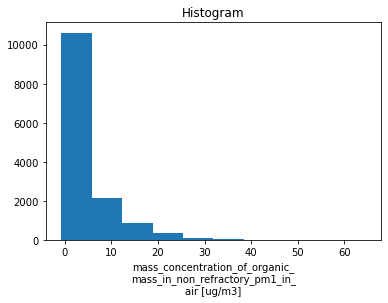

In [31]:
org_hyy['organic_mass_amean'].plot.hist()
#org_hyy['organic_mass_amean'].isel(metadata_time=1).plot()

In [1119]:
ds_mod = dic_ds[case_mod]

In [1120]:
num_levs = 7

In [1121]:
case_mod

'OsloAeroSec_intBVOC_f19_f19'

In [1122]:
dic_mod_lev = {}
dic_p = {}
for i in range(1,num_levs):
    _dic_df_sm,_dic_df = get_dic_df_mod(model_lev_i=-i)
    _p = float(ds_mod.lev.isel(lev=-i).values)
    _df = _dic_df[case_mod]
    _df.index = _df.index  + np.timedelta64(1,'h') 
    dic_mod_lev[i] = _df.copy()
    dic_p[i] = _p

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [1123]:
dic_mod_oa = dict()
dic_mod_soa = dict()
dic_mod_all = dict()
for i in range(1,num_levs):
    _df = dic_mod_lev[i]
    
    _mod_hyy_s2013 = _df['OA'].loc['2012-01-01':'2015-01-01']#.plot()
    dic_mod_oa[i] = _mod_hyy_s2013

    _mod_hyy_s2013 = _df['SOA'].loc['2012-01-01':'2015-01-01']#.plot()
    dic_mod_soa[i] = _mod_hyy_s2013

    _mod_hyy_s2013 = _df[varl + ['POA']].loc['2012-01-01':'2015-01-01']#.plot()
    dic_mod_all[i] = _mod_hyy_s2013


## Get on same dataset:

In [1124]:
_df_mod = dic_mod_oa[1].resample('h').mean()

obs_full_per = obs_hyy_s2013.resample('h').mean().loc['2012-07-01 02:00:00':'2014-08-31 23:00:00']
mod_full_per = _df_mod.resample('h').mean().loc['2012-07-01 02:00:00':'2014-08-31 23:00:00']
mod_full_per = mod_full_per.mask(obs_full_per.isnull())


In [1125]:
df_full_OA =pd.DataFrame()
df_full_OA['obs'] = obs_full_per
df_full_OA[case_mod] = mod_full_per

In [1126]:
df_full_OA

,obs,OsloAeroSec_intBVOC_f19_f19
time,,
2012-07-01 02:00:00,NaN,NaN
2012-07-01 03:00:00,NaN,NaN
2012-07-01 04:00:00,NaN,NaN
2012-07-01 05:00:00,NaN,NaN
2012-07-01 06:00:00,NaN,NaN
...,...,...
2014-08-31 19:00:00,NaN,NaN
2014-08-31 20:00:00,NaN,NaN
2014-08-31 21:00:00,NaN,NaN


<AxesSubplot:xlabel='time'>

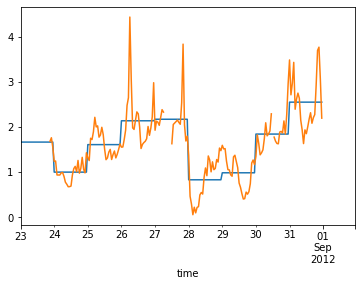

In [1127]:
fig, ax = plt.subplots()
df_full_OA['obs'].resample('D').mean().resample('h').ffill().loc['2012-08-23':'2012-09-01'].plot(ax = ax)
#df_full_OA.resample('D').mean().loc['2012-08-20':'2012-09-01'].plot(ax=ax, marker='*')
df_full_OA['obs'].loc['2012-08-23':'2012-09-01'].plot(ax=ax, )



In [1128]:
df_daily_mean = df_full_OA.resample('D').mean().resample('h').ffill()

In [1129]:
df_anom_OA = df_full_OA - df_daily_mean

In [1130]:
def res(x):
    nn = x[0]*df_daily_mean[case_mod] + x[1]*df_anom_OA[case_mod]
    n1 = (nn-df_full_OA['obs'])
    #print(n1)
    return n1[n1.notnull()]

In [1131]:
len(df_full_OA['obs'][df_full_OA['obs'].notnull()])/24

91.08333333333333

In [1132]:
hour = df_daily_mean[case_mod].index.hour

In [1133]:
df_daily_mean[case_mod].groupby(hour).mean()

time
0     3.107789
1     3.107789
2     3.107789
3     3.107789
4     3.107789
5     3.107789
6     3.107789
7     3.107789
8     3.107789
9     3.107789
10    3.107789
11    3.107789
12    3.107789
13    3.107789
14    3.107789
15    3.107789
16    3.107789
17    3.107789
18    3.107789
19    3.107789
20    3.107789
21    3.107789
22    3.107789
23    3.107789
Name: OsloAeroSec_intBVOC_f19_f19, dtype: float64

In [1134]:
df_daily_mean[case_mod].groupby(hour)

In [1135]:
def res_mean(x):
    hour = df_anom_OA[case_mod].index.hour
    anom = df_anom_OA[case_mod].groupby(hour).mean()
    hour = df_daily_mean[case_mod].index.hour
    daily = df_daily_mean[case_mod].groupby(hour).mean()
    nn = x[0]*daily + x[1]*anom
    n1 = (nn-df_full_OA['obs'].groupby(df_full_OA['obs'].index.hour).mean())
    #print(n1)
    return n1[n1.notnull()]

In [1136]:
daily = df_daily_mean[case_mod].groupby(hour).mean()

In [1137]:
df_daily_mean[case_mod].mean()

3.1077889003604486

In [1138]:
df_full_OA['obs'].mean()

8.522633577310154

In [1139]:
df_daily_mean['obs'].mean()

8.482866338678843

In [1140]:
test = np.array([1, 1])

In [1141]:
scipy.optimize.least_squares(res_mean, test,)

 active_mask: array([0., 0.])
        cost: 1.4990219157207276
         fun: array([ 0.07637855, -0.05485706,  0.09994353, -0.23324825, -0.27066985,
       -0.45197015, -0.65911601, -0.52571432, -0.21461247,  0.15254861,
       -0.06145665, -0.15710404,  0.09606745, -0.12932294, -0.28816985,
       -0.17331685,  0.03365518, -0.00864369,  0.0402607 ,  0.44290409,
        0.2014948 ,  0.61286921,  0.75755337,  0.71452665])
        grad: array([-2.39851363e-08, -1.38693906e-08])
         jac: array([[ 3.10778887,  0.32532152],
       [ 3.10778887,  0.35577873],
       [ 3.10778887,  0.35312616],
       [ 3.10778887,  0.29453105],
       [ 3.10778887,  0.24829577],
       [ 3.10778887,  0.25965324],
       [ 3.10778887,  0.33210437],
       [ 3.10778887,  0.3982616 ],
       [ 3.10778887,  0.39579564],
       [ 3.10778887,  0.1562573 ],
       [ 3.10778887, -0.13117642],
       [ 3.10778887, -0.31660445],
       [ 3.10778887, -0.388231  ],
       [ 3.10778887, -0.4538742 ],
       [ 3.1077

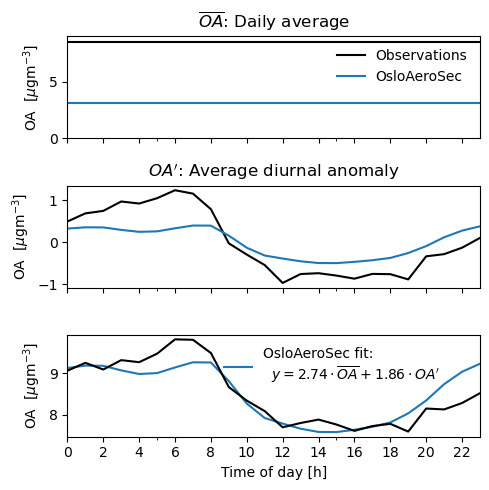

In [1157]:
fig, axs = plt.subplots(3,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
pl_obs = df_anom_OA['obs'].groupby(df_anom_OA['obs'].index.hour).mean()
pl_obs.plot(ax=ax,label='Observations', c='k')

df_anom_OA[case_mod].groupby(df_anom_OA[case_mod].index.hour).mean().plot(ax=ax,label='OsloAeroSec',)# c='k')
ax.set_title("$OA'$: Average diurnal anomaly") 
#ax.legend(frameon=False)

ax = axs[0]
daily_obs = df_daily_mean['obs'].groupby(hour).mean()
daily_obs.plot(ax=ax,label='Observations', c='k')
daily_mod = df_daily_mean[case_mod].groupby(hour).mean()
daily.plot(ax=ax,label='OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{OA}$: Average") 
ax.set_ylim([0,9])

ax = axs[2]
hour = df_anom_OA[case_mod].index.hour
anom = df_anom_OA[case_mod].groupby(hour).mean()
hour = df_daily_mean[case_mod].index.hour
daily = df_daily_mean[case_mod].groupby(hour).mean()
nn = 2.74*daily + 1.86*anom
nn.plot(label = "OsloAeroSec fit: \n  $y=2.74 \cdot \overline{OA}+ 1.86 \cdot OA'$       ")
pl_obs = df_full_OA['obs'].groupby(df_full_OA['obs'].index.hour).mean()
pl_obs.plot(ax=ax,label='__nolegend__', c='k')
ax.set_title("Diurnal pattern") 

plt.legend(frameon=False)
ax.set_xlabel('Time of day [h]')
for ax in axs: 
    ax.set_ylabel('OA  [$\mu$gm$^{-3}$]')
plt.tight_layout()

ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

ax.set_xlim([0,23])
fn = make_fn_eval(case_mod, 'decomp')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))



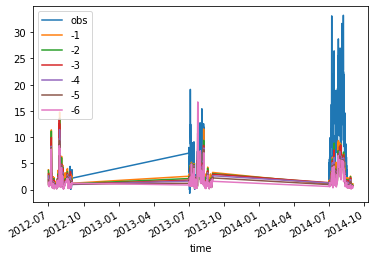

In [1144]:
obs_hyy_s2013.plot(label='obs')
for i in range(1,num_levs):
    dic_mod_oa[i].plot(label=f'-{i}')
#mod_hyy_s2013.plot()
#mod_hyy_s2013_2.plot()
plt.legend()

In [1145]:
dic_mod_an = dict()
for i in range(1,num_levs):
    _mod_hyy = dic_mod_oa[i]
    daily_mean = _mod_hyy.resample('D').mean().resample('h').ffill()
    _mod_an = _mod_hyy.resample('h').ffill()-daily_mean
    _mod_an = _mod_an[obs_an.index]# = obs_an[mask]
    _mod_an = _mod_an[mask]
    dic_mod_an[i] = _mod_an
    
    #mod_an2 = mod_hyy_s2013_2.resample('h').ffill()-mod_hyy_s2013.resample('D').mean().resample('h').ffill()


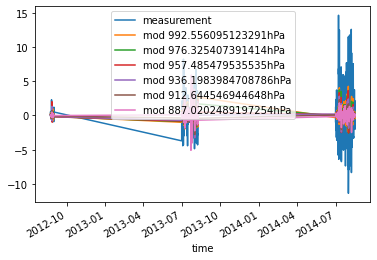

In [1146]:
obs_an.plot(label='measurement')
for i in range(1,num_levs):
    _mod_an = dic_mod_an[i] 
    p = dic_p[i]
    _mod_an.plot(label=f'mod {p}hPa')
#mod_an2.plot(label='mod2')

plt.legend()

In [1148]:
obs_an[obs_an.notnull()]

time
2012-08-23 22:00:00    0.016000
2012-08-23 23:00:00    0.096000
2012-08-24 00:00:00    0.552208
2012-08-24 01:00:00    0.239208
2012-08-24 02:00:00    0.246208
                         ...   
2014-08-15 19:00:00   -1.901792
2014-08-15 20:00:00   -1.484792
2014-08-15 21:00:00   -0.886792
2014-08-15 22:00:00   -0.347792
2014-08-15 23:00:00   -0.597792
Name: organic_mass_amean, Length: 2184, dtype: float64

In [1149]:
def make_cbar(fig, label):
    

    levs = [1000]+[np.round(dic_p[i]) for i in range(1,num_levs)] + [850]

    levs_bound = [(levs[i]+levs[i+1])/2 for i in np.arange(len(levs)-1)]

    lev_ticks = levs[1:-1][::-1]

    cmap= mpl.colors.ListedColormap(sns.color_palette('viridis_r',6))
    norm= mpl.colors.BoundaryNorm(levs_bound[::-1], len(levs_bound[::-1]))#, clip=True)

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmap), ticks = lev_ticks, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()



In [1150]:
def make_cbar(fig, label):
    
    levs = [992.556095123291,
     976.325407391414,
     957.485479535535,
     936.1983984708786,
     912.644546944648,
     887.0202489197254]

    aa = [levs[0]+(levs[0]-levs[1])/2]
    for i in range(len(levs)-1):
        b = (levs[i] + levs[i+1])/2
        aa.append(b)

    aa.append( levs[-1]+(levs[-1]-levs[-2])/2   )

    a1 = aa[0]
    a2 = aa[-1]
    
    
    cmap = plt.get_cmap('plasma_r')

    norm = mpl.colors.Normalize(vmin=a2,vmax=a1)

    cols = [cmap(norm(min(levs, key=lambda x:abs(x-xx)))) for xx in np.linspace(a2,a1,256)]

    cmm = mpl.colors.ListedColormap(cols)
    

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmm), ticks = levs, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()
    
    return norm, cmm


In [1151]:
obs_an 

time
2012-07-01 00:00:00   NaN
2012-07-01 01:00:00   NaN
2012-07-01 02:00:00   NaN
2012-07-01 03:00:00   NaN
2012-07-01 04:00:00   NaN
                       ..
2014-08-31 19:00:00   NaN
2014-08-31 20:00:00   NaN
2014-08-31 21:00:00   NaN
2014-08-31 22:00:00   NaN
2014-08-31 23:00:00   NaN
Name: organic_mass_amean, Length: 4464, dtype: float64

In [1152]:
_mod_an = dic_mod_an[i]
_mod_an

time
2012-08-23 22:00:00    0.103275
2012-08-23 23:00:00    0.103589
2012-08-24 00:00:00   -0.076243
2012-08-24 01:00:00   -0.080114
2012-08-24 02:00:00   -0.084594
                         ...   
2014-08-15 19:00:00    0.074387
2014-08-15 20:00:00    0.042460
2014-08-15 21:00:00   -0.023176
2014-08-15 22:00:00   -0.104562
2014-08-15 23:00:00   -0.191651
Name: OA, Length: 2184, dtype: float64

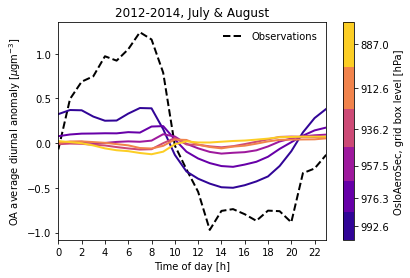

In [1155]:
fig, ax  = plt.subplots()
ob_pl = obs_an.groupby(obs_an.index.hour).mean()
ob_pl.plot(label='Observations', color='k', ax=ax,linestyle='dashed', linewidth=2)
#ob_pl = obs_an.groupby(obs_an.index.hour).median()
#ob_pl.plot(label='__nolegend__', color='k', ax=ax, alpha=.3)
norm, cmm = make_cbar(fig, 'OsloAeroSec, grid box level [hPa]')

for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    _mod_an = dic_mod_an[i] 
    p = dic_p[i]

    mo_pl = _mod_an.groupby(_mod_an.index.hour).mean()
    lab = '__nolegend__'
    #if i ==num_levs-1:
    #    lab='OsloAero'
    c = cmm(norm(p))
    mo_pl.plot(label=lab, ax=ax, c=c, linewidth=2)
    #mo_pl.plot(label=f'OsloAero, {p:.0f}hPa', ax=ax, c=c)
    #mo_pl.plot(label='__nolegend__', ax=ax, c=c, linewidth=2)
    #mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label='__nolegend__', ax=ax, c=c, alpha=.3)

    #mo_pl2 = mod_an2.groupby(mod_an.index.hour).mean()
#mo_pl2.plot(label=f'OsloAero, {p2:.0f}hPa', ax = ax)

ax.set_xlabel('Time of day [h]')
ax.set_ylabel('OA average diurnal anomaly [$\mu$gm$^{-3}$]')
ax.legend(frameon=False)
ax.set_title('2012-2014, July & August')

#make_cbar(fig, 'OsloAero, grid box level [hPa]')


ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

ax.set_xlim([0,23])



fn = make_fn_eval('OsloAeroSec','diurnal_anomaly')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

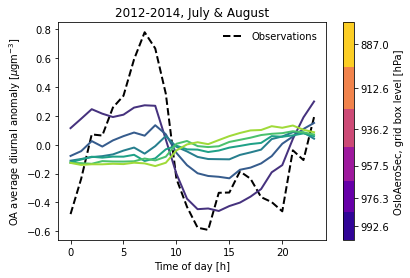

In [1154]:
fig, ax  = plt.subplots()
ob_pl = obs_an.groupby(obs_an.index.hour).median()
ob_pl.plot(label='Observations', color='k', ax=ax,linestyle='dashed', linewidth=2)
#ob_pl = obs_an.groupby(obs_an.index.hour).median()
#ob_pl.plot(label='__nolegend__', color='k', ax=ax, alpha=.3)

for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    _mod_an = dic_mod_an[i] 
    p = dic_p[i]

    mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label=f'OsloAero, {p:.0f}hPa', ax=ax, c=c)
    lab = '__nolegend__'
    #if i ==num_levs-1:
    #    lab='OsloAero'
    mo_pl.plot(label=lab, ax=ax, c=c, linewidth=2)
    #mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label='__nolegend__', ax=ax, c=c, alpha=.3)

    #mo_pl2 = mod_an2.groupby(mod_an.index.hour).mean()
#mo_pl2.plot(label=f'OsloAero, {p2:.0f}hPa', ax = ax)

ax.set_xlabel('Time of day [h]')
ax.set_ylabel('OA average diurnal anomaly [$\mu$gm$^{-3}$]')
ax.legend(frameon=False)
ax.set_title('2012-2014, July & August')

make_cbar(fig, 'OsloAeroSec, grid box level [hPa]')


fn = make_fn_eval('OsloAeroSec','diurnal_anomaly_median')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [749]:
import matplotlib as mpl

In [750]:
993/976

1.0174180327868851

In [751]:
10000/993

10.070493454179255

In [752]:
_mean_lev1 = dic_mod_oa[1].mean()
_mean_lev2 = dic_mod_oa[2].mean()
_mean_lev1/_mean_lev2

1.097516290015016

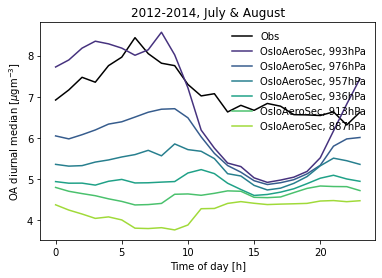

In [768]:
fig, ax  = plt.subplots()
ob_pl = obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).median()
ob_pl.plot(label='Obs', color='k', ax=ax)
#ob_pl = obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).median()
#ob_pl.plot(label='__nolabel__', color='k', ax=ax, alpha=.4,)

for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    _mod_an = dic_mod_oa[i] 
    p = dic_p[i]

    mo_pl = _mod_an.groupby(_mod_an.index.hour).median()*3.8
    mo_pl.plot(label=f'OsloAeroSec, {p:.0f}hPa', ax=ax, c=c)
    #mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label='__nolabel__', ax=ax, c=c, alpha=.4)
#mo_pl2 = mod_an2.groupby(mod_an.index.hour).mean()
#mo_pl2.plot(label=f'OsloAero, {p2:.0f}hPa', ax = ax)

ax.set_xlabel('Time of day [h]')
ax.set_ylabel('OA diurnal median [$\mu$gm$^{-3}$]')
ax.legend(frameon=False)
ax.set_title('2012-2014, July & August')
fn = make_fn_eval('OsloAeroSec','diurnal_median')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

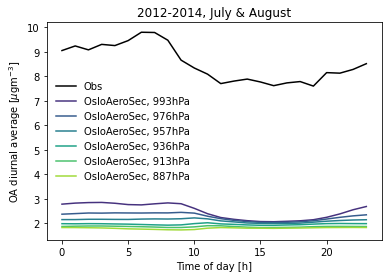

In [776]:
fig, ax  = plt.subplots()
ob_pl = obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).mean()
ob_pl.plot(label='Obs', color='k', ax=ax)
#ob_pl = obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).median()
#ob_pl.plot(label='__nolabel__', color='k', ax=ax, alpha=.4,)

for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    _mod_an = dic_mod_oa[i] 
    p = dic_p[i]

    mo_pl = _mod_an.groupby(_mod_an.index.hour).mean()#+(-_mod_an.groupby(_mod_an.index.hour).mean().mean() +obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).mean().mean())
    mo_pl.plot(label=f'OsloAeroSec, {p:.0f}hPa', ax=ax, c=c)
    #mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label='__nolabel__', ax=ax, c=c, alpha=.4)
#mo_pl2 = mod_an2.groupby(mod_an.index.hour).mean()
#mo_pl2.plot(label=f'OsloAero, {p2:.0f}hPa', ax = ax)

ax.set_xlabel('Time of day [h]')
ax.set_ylabel('OA diurnal average [$\mu$gm$^{-3}$]')
ax.legend(frameon=False)
ax.set_title('2012-2014, July & August')
fn = make_fn_eval('OsloAeroSec','diurnal_mean')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [756]:
mi = np.min(obs_hyy_s2013[obs_hyy_s2013>0])
ma = np.max(obs_hyy_s2013)
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)

In [757]:
_mod_an = dic_mod_oa[1]

a = obs_hyy_s2013.resample('h').ffill()

_com =pd.merge(a, _mod_an, on='time')#, right=True)

_mod_an_soa = dic_mod_soa[1]
_com =pd.merge(_com, _mod_an_soa, on='time')#, right=True)
_mod_an_soa = dic_mod_all[1]
_com =pd.merge(_com, _mod_an_soa, on='time')#, right=True)


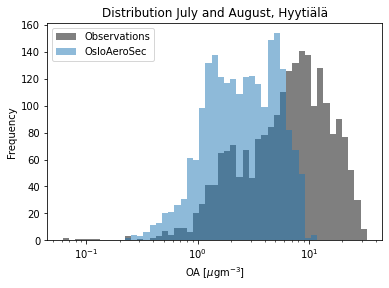

In [758]:
_com['organic_mass_amean'].plot.hist(bins=bins_, alpha=0.5, 
                                     color='k',
                                     label='Observations'
                                    )
plt.xscale('log')
_mod_an = _com['OA'][_com['organic_mass_amean'].notnull()] 
_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAeroSec')
#_mod_an = _com['SOA'][_com['organic_mass_amean'].notnull()] 
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August, Hyytiälä')

plt.legend()
fn = make_fn_eval('OsloAeroSec','hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [766]:
_com['organic_mass_amean'].median()/_mod_an.median()

6.251894953638592

In [888]:
2.9/1.9

1.5263157894736843

In [765]:
_mod_an.median()

1.1220597997919466

In [489]:
_com['SOA/POA'] = _com['SOA']/_com['POA']

In [490]:
_bins =  10 ** np.linspace(-2, 2, 50)

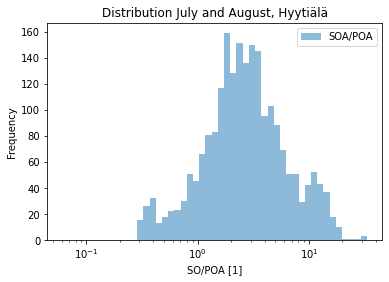

In [492]:
#_com[['SOA','POA']].plot.hist(bins=bins_, alpha=0.5, 
#                                     color='o',
#                                     label='OA'
#                                    )
#
_mod_an = _com['SOA/POA'][_com['organic_mass_amean'].notnull()]#_com['OA'].notnull()] 
_mod_an.plot.hist(bins=bins_, alpha=0.5, stacked=False)
plt.xlabel('SO/POA [1]')
plt.xscale('log')
plt.title('Distribution July and August, Hyytiälä')

plt.legend()
fn = make_fn_eval('OsloAero','SOA2POA_mod')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [438]:
_com['hour'] = _com.index.hour


In [440]:
_com['U']

time
2012-07-01 02:00:00    0.173258
2012-07-01 03:00:00    0.665973
2012-07-01 04:00:00    1.175882
2012-07-01 05:00:00    1.485303
2012-07-01 06:00:00    1.555731
                         ...   
2014-08-31 19:00:00   -2.443362
2014-08-31 20:00:00   -2.693855
2014-08-31 21:00:00   -2.732171
2014-08-31 22:00:00   -2.700533
2014-08-31 23:00:00   -2.631574
Name: U, Length: 4462, dtype: float32

In [444]:
import numpy as np

In [449]:
_com['dir'] = (180+180/np.pi*np.arctan2(_com['V'], _com['U']))%360

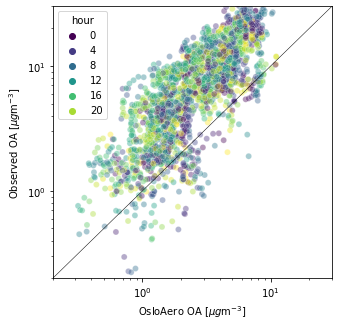

In [467]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='OA', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='hour', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')



lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## Daily median:

In [459]:
com_daily = _com.resample('D').median()

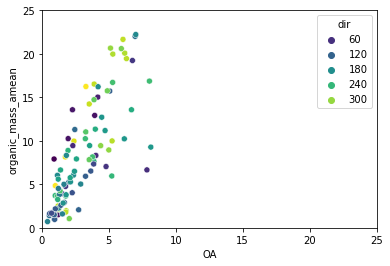

In [464]:
sns.scatterplot(x='OA', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='dir', 
                #ax=ax,
                #alpha=0.4,
                palette = 'viridis',
                edgecolors=None,
                data = com_daily)

plt.xlim([0,25])

plt.ylim([0,25])
plt.show()

looks reasonable. 


In [256]:
_mod_an = (_com['OA']-_com['organic_mass_amean'])
mi = np.min(np.abs(_mod_an))
ma = np.max(np.abs(_mod_an))
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 25)

bins_ = np.concatenate([-bins_[::-1], bins_])
bins_.shape

(50,)

In [218]:
bins_

array([-3.06075859e+01, -2.17271171e+01, -1.54232228e+01, -1.09483371e+01,
       -7.77179237e+00, -5.51688864e+00, -3.91622149e+00, -2.77997106e+00,
       -1.97339172e+00, -1.40083289e+00, -9.94395977e-01, -7.05882454e-01,
       -5.01078092e-01, -3.55695559e-01, -2.52494238e-01, -1.79235693e-01,
       -1.27232344e-01, -9.03172188e-02, -6.41126287e-02, -4.55110245e-02,
       -3.23064799e-02, -2.29330949e-02, -1.62792989e-02, -1.15560317e-02,
       -8.20317078e-03,  8.20317078e-03,  1.15560317e-02,  1.62792989e-02,
        2.29330949e-02,  3.23064799e-02,  4.55110245e-02,  6.41126287e-02,
        9.03172188e-02,  1.27232344e-01,  1.79235693e-01,  2.52494238e-01,
        3.55695559e-01,  5.01078092e-01,  7.05882454e-01,  9.94395977e-01,
        1.40083289e+00,  1.97339172e+00,  2.77997106e+00,  3.91622149e+00,
        5.51688864e+00,  7.77179237e+00,  1.09483371e+01,  1.54232228e+01,
        2.17271171e+01,  3.06075859e+01])

In [226]:
_com

,organic_mass_amean,OA,hour
time,,,
2012-08-23 22:00:00,1.683,0.425025,22
2012-08-23 23:00:00,1.763,0.423846,23
2012-08-24 00:00:00,1.555,0.420292,0
2012-08-24 01:00:00,1.242,0.417300,1
2012-08-24 02:00:00,1.249,0.413751,2
...,...,...,...
2014-08-15 20:00:00,2.510,1.242237,20
2014-08-15 21:00:00,3.108,1.202057,21
2014-08-15 22:00:00,3.647,1.135992,22


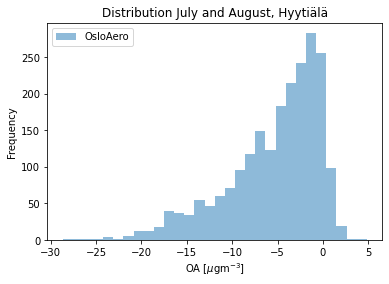

In [258]:
#_com['organic_mass_amean'].plot.hist(bins=bins_, alpha=0.5, 
#                                     color='k',
#                                     label='Observations'
#                                    )
#plt.xscale('log')
_mod_an = (_com['OA']-_com['organic_mass_amean'])#[_com['organic_mass_amean'].notnull()] 
_mod_an.plot.hist( alpha=0.5,label='OsloAero', bins=30)
plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August, Hyytiälä')

plt.legend()


In [260]:
_com#['OA']

,organic_mass_amean,OA,hour
time,,,
2012-07-01 02:00:00,NaN,3.733415,2
2012-07-01 03:00:00,NaN,3.772739,3
2012-07-01 04:00:00,NaN,2.990302,4
2012-07-01 05:00:00,NaN,1.823886,5
2012-07-01 06:00:00,NaN,1.600500,6
...,...,...,...
2014-08-31 19:00:00,NaN,0.749462,19
2014-08-31 20:00:00,NaN,0.792446,20
2014-08-31 21:00:00,NaN,0.851335,21


In [261]:
_com['OA']

time
2012-07-01 02:00:00    3.733415
2012-07-01 03:00:00    3.772739
2012-07-01 04:00:00    2.990302
2012-07-01 05:00:00    1.823886
2012-07-01 06:00:00    1.600500
                         ...   
2014-08-31 19:00:00    0.749462
2014-08-31 20:00:00    0.792446
2014-08-31 21:00:00    0.851335
2014-08-31 22:00:00    0.906703
2014-08-31 23:00:00    0.970553
Name: OA, Length: 4462, dtype: float64

In [249]:
_mod_an = dic_mod_all[1]

a = obs_hyy_s2013.resample('h').ffill()

_com =pd.merge(a, _mod_an, on='time')#, right=True)